In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Movies Dataset

In [2]:
movies = pd.read_csv("movies.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(9742, 3)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


# Ratings Dataset

In [6]:
ratings = pd.read_csv("ratings.csv")

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings.shape

(100836, 4)

**No. of Unique UserId**

In [9]:
ratings['userId'].nunique()

610

**The movie which recieved maximum no. of user ratings**

In [10]:
ratings.groupby(['movieId'])['rating'].value_counts().sort_values(ascending=False)

movieId  rating
318      5.0       153
296      5.0       123
356      5.0       116
2571     5.0       109
260      5.0       104
                  ... 
5096     1.0         1
5095     4.5         1
5094     3.0         1
         1.5         1
193609   4.0         1
Name: rating, Length: 30417, dtype: int64

In [11]:
movies[movies['movieId']==318]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


# Tags Dataset

In [12]:
tags = pd.read_csv("tags.csv")

In [13]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [15]:
df=pd.merge(movies,ratings,on='movieId',how='inner')

In [16]:
df.shape

(100836, 6)

**The correct tags submitted by users to "Matrix, The(1999)" movie**

In [17]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [18]:
tags[tags['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


**The average user rating for movie named "Terminator 2: Judgement Day(1991)"**

In [19]:
movies[movies['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [20]:
ratings[ratings['movieId']==589]

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012
...,...,...,...,...
97461,606,589,3.5,1171325855
98514,607,589,4.0,963078960
98786,608,589,3.0,1117415154
99519,609,589,3.0,847220990


In [21]:
ratings[ratings['movieId']==589]['rating'].mean()

3.970982142857143

In [22]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [23]:
df.groupby(['title','rating'])['rating'].count().sort_values(ascending=False)

title                                                   rating
Shawshank Redemption, The (1994)                        5.0       153
Pulp Fiction (1994)                                     5.0       123
Forrest Gump (1994)                                     5.0       116
Matrix, The (1999)                                      5.0       109
Star Wars: Episode IV - A New Hope (1977)               5.0       104
                                                                 ... 
In China They Eat Dogs (I Kina spiser de hunde) (1999)  4.0         1
In Bruges (2008)                                        2.5         1
In America (2002)                                       3.5         1
                                                        2.5         1
À nous la liberté (Freedom for Us) (1931)               1.0         1
Name: rating, Length: 30413, dtype: int64

**The data distribution of user ratings for "Flight Club(1999)" movies**

In [24]:
df[df['title']=='Fight Club (1999)']

,movieId,title,genres,userId,rating,timestamp
49835,2959,Fight Club (1999),Action|Crime|Drama|Thriller,1,5.0,964983282
49836,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4,2.0,945078528
49837,2959,Fight Club (1999),Action|Crime|Drama|Thriller,10,0.5,1455356582
49838,2959,Fight Club (1999),Action|Crime|Drama|Thriller,15,2.5,1510571747
49839,2959,Fight Club (1999),Action|Crime|Drama|Thriller,16,3.5,1377476874
...,...,...,...,...,...,...
50048,2959,Fight Club (1999),Action|Crime|Drama|Thriller,601,5.0,1441639461
50049,2959,Fight Club (1999),Action|Crime|Drama|Thriller,603,4.0,963176105
50050,2959,Fight Club (1999),Action|Crime|Drama|Thriller,606,5.0,1171231517
50051,2959,Fight Club (1999),Action|Crime|Drama|Thriller,608,5.0,1117336631


In [25]:
df[df['title']=='Fight Club (1999)'].groupby('title')['rating'].value_counts()

title              rating
Fight Club (1999)  5.0       81
                   4.0       49
                   4.5       49
                   3.5       17
                   3.0       10
                   2.0        5
                   0.5        3
                   2.5        3
                   1.5        1
Name: rating, dtype: int64

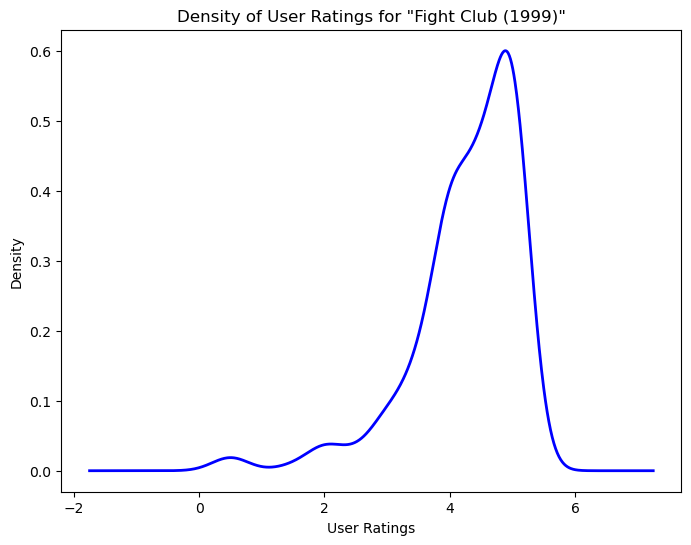

In [26]:
data = {'user_rating':list(df.loc[df['title']=='Fight Club (1999)','rating'])}
ratings_df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
ratings_df['user_rating'].plot(kind='kde', color='blue', linewidth=2)

#Add labels and title
plt.title('Density of User Ratings for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Density')

plt.show()

In [27]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


**Mandatory Operations**

In [28]:
g=df.groupby('movieId')['rating'].agg(['count','mean']).reset_index()

In [29]:
g

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [30]:
updated_movies=pd.merge(movies,g, on='movieId')

In [31]:
updated_movies

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [32]:
updated_movies.shape

(9724, 5)

In [33]:
updated_movies=updated_movies[updated_movies['count']>50]

In [34]:
updated_movies=updated_movies.rename(columns={'count':'no_of_rating','mean':'mean_ratings'})

In [35]:
updated_movies

,movieId,title,genres,no_of_rating,mean_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


**The movie which is the most popular based on average user rating**

In [36]:
updated_movies.groupby('title')['mean_ratings'].max().sort_values(ascending=False)

title
Shawshank Redemption, The (1994)                                               4.429022
Godfather, The (1972)                                                          4.289062
Fight Club (1999)                                                              4.272936
Cool Hand Luke (1967)                                                          4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.268041
                                                                                 ...   
Johnny Mnemonic (1995)                                                         2.679245
Judge Dredd (1995)                                                             2.669355
City Slickers II: The Legend of Curly's Gold (1994)                            2.645455
Coneheads (1993)                                                               2.420635
Wild Wild West (1999)                                                          2.207547
Name: mean_ratings, Length

In [37]:
updated_movies['no_of_rating'].sort_values(ascending=False)

314     329
277     317
257     307
510     279
1938    278
       ... 
3147     51
3490     51
3539     51
118      51
1235     51
Name: no_of_rating, Length: 436, dtype: int64

In [38]:
updated_movies[updated_movies['no_of_rating']==329]

,movieId,title,genres,no_of_rating,mean_ratings
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134


**The movie whose under Top 5 popular movies based on number of user ratings**

In [39]:
updated_movies.sort_values(by=["no_of_rating"],ascending=False)

,movieId,title,genres,no_of_rating,mean_ratings
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


**The Sci-Fi movie which is the third most popular based on the number of user ratings**

In [40]:
updated_movies['genres']=updated_movies['genres'].str.split('|')

In [41]:
updated_movies

,movieId,title,genres,no_of_rating,mean_ratings
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615
5,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078
6,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846
8358,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151
8457,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847


In [42]:
updated_movies[updated_movies['genres'].apply(lambda x: 'Sci-Fi' in x)].sort_values(by=["no_of_rating"],ascending=False)

,movieId,title,genres,no_of_rating,mean_ratings
1938,2571,"Matrix, The (1999)","[Action, Sci-Fi, Thriller]",278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",251,4.231076
418,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi, Thriller]",238,3.750000
507,589,Terminator 2: Judgment Day (1991),"[Action, Sci-Fi]",224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,"[Action, Adventure, Sci-Fi]",211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),"[Action, Adventure, Comedy, Sci-Fi]",54,3.833333
144,172,Johnny Mnemonic (1995),"[Action, Sci-Fi, Thriller]",53,2.679245
2028,2701,Wild Wild West (1999),"[Action, Comedy, Sci-Fi, Western]",53,2.207547
559,673,Space Jam (1996),"[Adventure, Animation, Children, Comedy, Fanta...",53,2.707547


In [43]:
import requests
import numpy as np
from bs4 import BeautifulSoup 

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating  else np.nan

# Links Dataset

In [44]:
links = pd.read_csv("links.csv")

In [45]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [48]:
returnId = []
for i in range(20):
    a = scrapper(links["imdbId"][i])
    returnId.append(a)

In [49]:
returnId

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

The rating is not show, i think it is some mistake from my side.

In [50]:
links["imdbId"][0]

114709

In [51]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [52]:
new=pd.merge(updated_movies,links,on='movieId')

In [53]:
new

,movieId,title,genres,no_of_rating,mean_ratings,imdbId,tmdbId
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,114709,862.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,113228,15602.0
3,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,113277,949.0
4,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,2015381,118340.0


In [54]:
new_rating=[]
for i in range(len(new)):
    a = scrapper(new["imdbId"][i])
    new_rating.append(a)

In [55]:
len(new_rating)

436

In [56]:
new['new_ratings']=new_rating

In [57]:
new

,movieId,title,genres,no_of_rating,mean_ratings,imdbId,tmdbId,new_ratings
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,114709,862.0,NaN
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,113497,8844.0,NaN
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,113228,15602.0,NaN
3,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,113277,949.0,NaN
4,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,114319,11860.0,NaN
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667,993846,106646.0,NaN
432,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846,2278388,120467.0,NaN
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,816692,157336.0,NaN
434,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,2015381,118340.0,NaN


In [58]:
new[new['genres'].apply(lambda x: 'Sci-Fi' in x)].sort_values(by=["new_ratings"],ascending=False)

,movieId,title,genres,no_of_rating,mean_ratings,imdbId,tmdbId,new_ratings
12,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",177,3.983051,114746,63.0,NaN
30,160,Congo (1995),"[Action, Adventure, Mystery, Sci-Fi]",57,2.877193,112715,10329.0,NaN
35,172,Johnny Mnemonic (1995),"[Action, Sci-Fi, Thriller]",53,2.679245,113481,9886.0,NaN
36,173,Judge Dredd (1995),"[Action, Crime, Sci-Fi]",62,2.669355,113492,9482.0,NaN
38,208,Waterworld (1995),"[Action, Adventure, Sci-Fi]",115,2.913043,114898,9804.0,NaN
...,...,...,...,...,...,...,...,...
427,89745,"Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",69,3.869565,848228,24428.0,NaN
428,91500,The Hunger Games (2012),"[Action, Adventure, Drama, Sci-Fi, Thriller]",54,3.435185,1392170,70160.0,NaN
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,816692,157336.0,NaN
434,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,2015381,118340.0,NaN


In [59]:
new.sort_values(by='new_ratings',ascending=False)

,movieId,title,genres,no_of_rating,mean_ratings,imdbId,tmdbId,new_ratings
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,114709,862.0,NaN
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,113497,8844.0,NaN
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,113228,15602.0,NaN
3,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,113277,949.0,NaN
4,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,114319,11860.0,NaN
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667,993846,106646.0,NaN
432,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846,2278388,120467.0,NaN
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,816692,157336.0,NaN
434,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,2015381,118340.0,NaN
